[Data](https://www.kaggle.com/datasets/zeesolver/consumer-behavior-and-shopping-habits-dataset) Source


# Business Understanding:

### Objective: 
 Utilize the Consumer Behavior and Shopping Habits Dataset to understand customer preferences and behaviors, segment the customer base, and tailor marketing strategies to improve customer engagement, satisfaction, and loyalty.

### Key Questions:
- What are the predominant purchasing patterns in different demographic groups?
- Which products are preferred by different segments of customers?
- How do preferences vary between online and offline shopping channels?

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [9]:
#import data using pandas
df = pd.read_csv('../Data/shopping_trends.csv')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [11]:
#show first 5 rows
df.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [12]:
#going to drop any duplicates if there are any
df = df.drop_duplicates()

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

In [14]:
# Looks like we had no duplicates in our data
# looks also like we have no missing values but let's check
df.isnull().sum()

Customer ID                 0
Age                         0
Gender                      0
Item Purchased              0
Category                    0
Purchase Amount (USD)       0
Location                    0
Size                        0
Color                       0
Season                      0
Review Rating               0
Subscription Status         0
Payment Method              0
Shipping Type               0
Discount Applied            0
Promo Code Used             0
Previous Purchases          0
Preferred Payment Method    0
Frequency of Purchases      0
dtype: int64

In [15]:
df.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [16]:
#Lets use the IQR method to identify outliers
def detect_outliers(df,columns):
    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[columns] < lower_bound) | (df[columns] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

In [19]:
purchase_outliers = detect_outliers(df,'Purchase Amount (USD)')
age_outliers = detect_outliers(df,'Age')
previous_purchases_outliers = detect_outliers(df,'Purchase Amount (USD)')

(purchase_outliers, age_outliers, previous_purchases_outliers)

((0, -24.0, 144.0), (0, -8.0, 96.0), (0, -24.0, 144.0))

### Purchase Amount (USD):

- Number of Outliers: 0
- Lower Bound for Outliers:  \-$24.00
- Upper Bound for Outliers: \$144.00

### Age:
- Number of Outliers: 0
- Lower Bound for Outliers: -8 years (which doesn't make practical sense, indicating no real outliers in the age data)
- Upper Bound for Outliers: 96 years

### Previous Purchases:
- Number of Outliers: 0
- Lower Bound for Outliers: -24.5 purchases (again, not practical, suggesting no real outliers)
- Upper Bound for Outliers: 75.5 purchases

### Conclusion:
- We can see that there are no outliers in the Purchase Amount (USD) data
- We can see that there are no outliers in the Age data
- We can see that there are no outliers in the Previous Purchases data

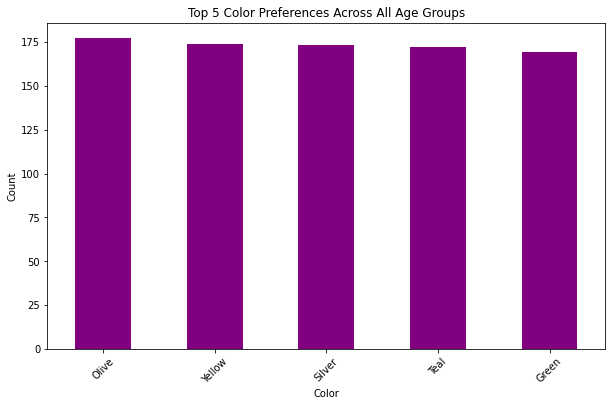

In [36]:
# Creating a bar graph for the overall top 5 color preferences across all age groups

# Aggregating color preferences across all age groups
overall_color_preferences = df['Color'].value_counts().head(5)

# Plotting the data
plt.figure(figsize=(10, 6))
overall_color_preferences.plot(kind='bar', color='purple')
plt.title('Top 5 Color Preferences Across All Age Groups')
plt.ylabel('Count')
plt.xlabel('Color')
plt.xticks(rotation=45)
plt.show()

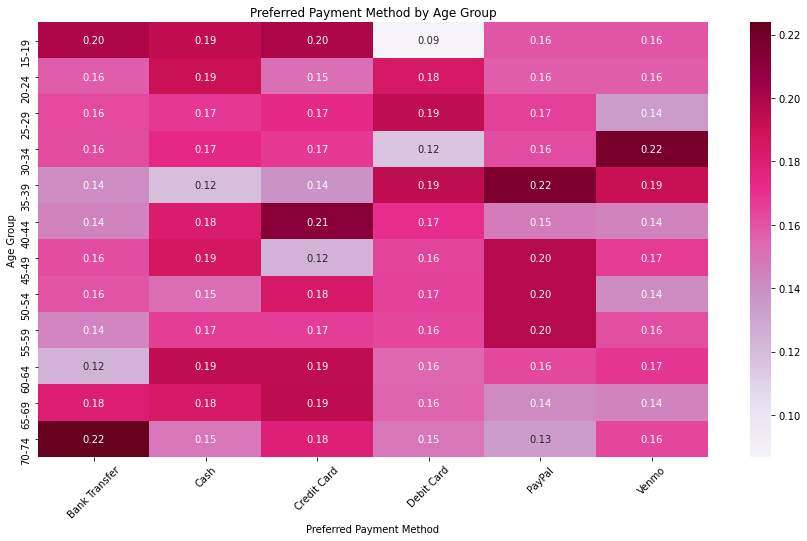

In [32]:
payment_preference = pd.crosstab(df['Age Group'], df['Preferred Payment Method'])
payment_preference_normalized = payment_preference.div(payment_preference.sum(1), axis=0)

# Plotting the data
plt.figure(figsize=(15, 8))
sns.heatmap(payment_preference_normalized, annot=True, fmt=".2f", cmap="PuRd")
plt.title('Preferred Payment Method by Age Group')
plt.ylabel('Age Group')
plt.xlabel('Preferred Payment Method')
plt.xticks(rotation=45)
plt.show()


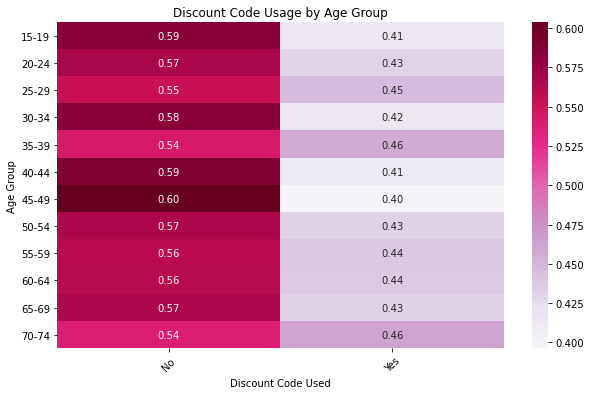

In [31]:
# For simplicity, assuming 'Discount Applied' column indicates whether a discount code was used
discount_usage = pd.crosstab(df['Age Group'], df['Discount Applied'])
discount_usage_normalized = discount_usage.div(discount_usage.sum(1), axis=0)

# Plotting the data
plt.figure(figsize=(10, 6))
sns.heatmap(discount_usage_normalized, annot=True, fmt=".2f", cmap="PuRd")
plt.title('Discount Code Usage by Age Group')
plt.ylabel('Age Group')
plt.xlabel('Discount Code Used')
plt.xticks(rotation=45)
plt.show()


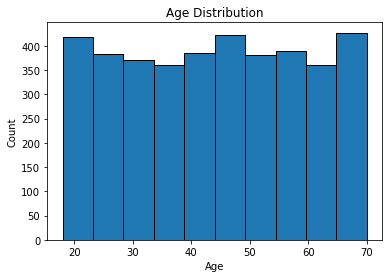

In [38]:
plt.hist(df['Age'], bins=10, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

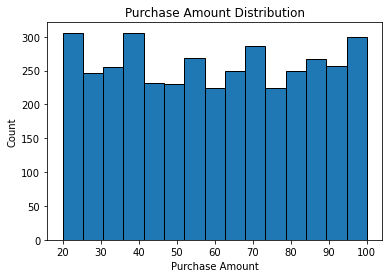

In [39]:
plt.hist(df['Purchase Amount (USD)'], bins=15, edgecolor='black')
plt.xlabel('Purchase Amount')
plt.ylabel('Count')
plt.title('Purchase Amount Distribution')
plt.show()

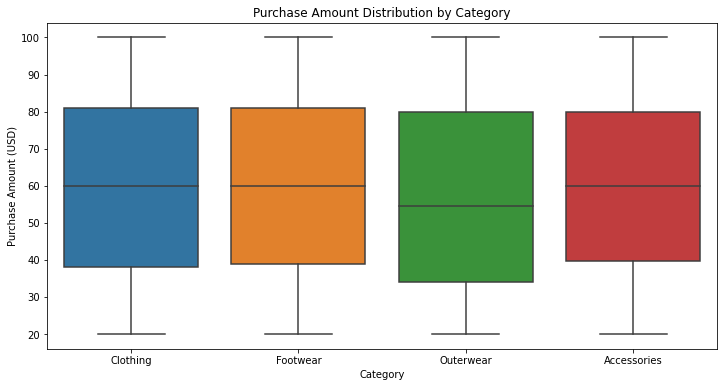

In [41]:
# Purchase Amount Distribution by Category (Box Plot)
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Purchase Amount (USD)', data=df)
plt.title('Purchase Amount Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Purchase Amount (USD)')
plt.show()

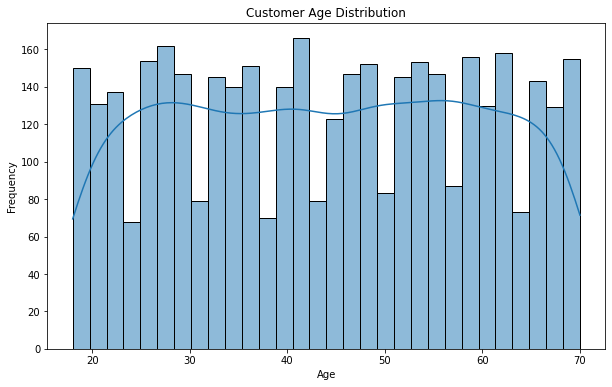

In [43]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Customer Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


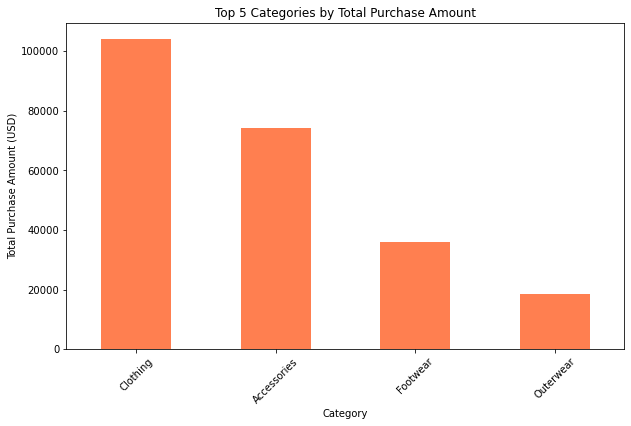

In [45]:
# Grouping by category and summing the purchase amounts
category_purchase_totals = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False).head(5)

# Plotting the data
plt.figure(figsize=(10, 6))
category_purchase_totals.plot(kind='bar', color='coral')
plt.title('Top 5 Categories by Total Purchase Amount')
plt.xlabel('Category')
plt.ylabel('Total Purchase Amount (USD)')
plt.xticks(rotation=45)
plt.show()

<Figure size 864x432 with 0 Axes>

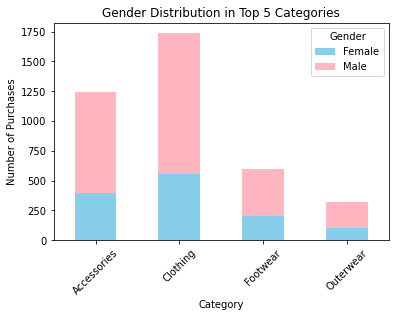

In [46]:
# Filtering the top 5 categories
top_categories = category_purchase_totals.index.tolist()
top_categories_data = df[df['Category'].isin(top_categories)]

# Grouping by category and gender
gender_distribution = top_categories_data.groupby(['Category', 'Gender']).size().unstack().fillna(0)

# Plotting the data
plt.figure(figsize=(12, 6))
gender_distribution.plot(kind='bar', stacked=True, color=['skyblue', 'lightpink'])
plt.title('Gender Distribution in Top 5 Categories')
plt.xlabel('Category')
plt.ylabel('Number of Purchases')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()
